# Importing Necessary Modules

In [29]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
sb.set()

fashiondata_raw = pd.read_csv('fashion_data_2018_2022.csv')
fashiondata_extracted = pd.DataFrame(fashiondata_raw[["gender", "color", "price", "material", "year_of_sale", "age_group", "season", "category", "sales_count", "average_rating"]])

df = fashiondata_extracted.groupby(['year_of_sale', 'season', 'category']).sum()
pivoted = pd.pivot_table(df, values='sales_count', index=['year_of_sale', 'season'], columns=['category'])
pivoted = pivoted.fillna(0).astype(int)

summed_sales = pivoted.sum(axis=1)
finaldataset = pd.DataFrame(summed_sales, columns=['total_sales'])

# Using One Hot Encoder for Categorical Predictors

In [30]:
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
fashiondata_extracted_cat = fashiondata_extracted[['material','season', 'color', 'category']]
ohe.fit(fashiondata_extracted_cat)
fashiondata_extracted_cat_ohe = pd.DataFrame(ohe.transform(fashiondata_extracted_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(fashiondata_extracted_cat.columns))

fashiondata_extracted_num = fashiondata_extracted[['price','sales_count','average_rating', 'year_of_sale']]
fashiondata_extracted_res = fashiondata_extracted['gender']
fashiondata_ohe = pd.concat([fashiondata_extracted_num, fashiondata_extracted_cat_ohe, fashiondata_extracted_res], 
                           sort = False, axis = 1).reindex(index=fashiondata_extracted_num.index)

# Splitting Data into Train and Test Dataset

In [31]:
y = pd.DataFrame(fashiondata_ohe['gender'])
X = pd.DataFrame(fashiondata_ohe.drop('gender', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Fitting Data for Gradient Boosting Classifier

In [32]:
gb = GradientBoostingClassifier()

# Fit the model to the training data
gb.fit(X_train, y_train.gender.ravel())

GradientBoostingClassifier()

# Confusion Matrix and Performance Metrics for Training Data

Train Data
Accuracy  :	 0.9272727272727272

TPR Train :	 0.9395161290322581
TNR Train :	 0.9149797570850202

FPR Train :	 0.08502024291497975
FNR Train :	 0.06048387096774194


<Axes: >

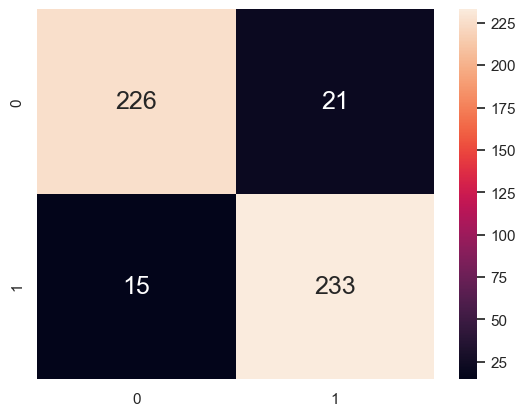

In [33]:
y_train_pred = gb.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", gb.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Confusion Matrix and Performance Metrics for Testing Data

Test Data
Accuracy  :	 0.509090909090909

TPR Test :	 0.4691358024691358
TNR Test :	 0.5476190476190477

FPR Test :	 0.4523809523809524
FNR Test :	 0.5308641975308642


<Axes: >

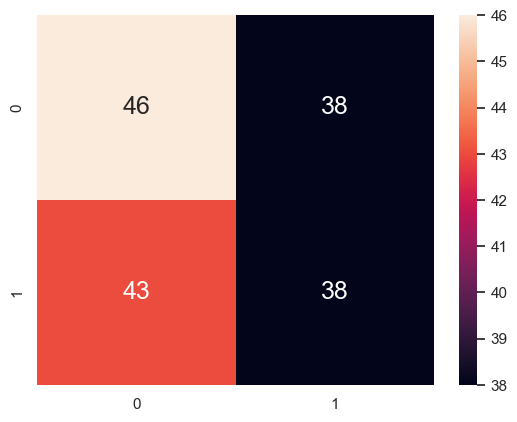

In [34]:
y_test_pred = gb.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", gb.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})